# 머신러닝과 딥러닝의 차이점

![](https://myservername.com/img/other/06/data-mining-vs-machine-learning-vs-artificial-intelligence-vs-deep-learning-6.png)

- **머신러닝**은 모델을 학습하기 위해 처리가 필요한 부분을 수동으로 처리해야 합니다.
- **딥러닝**은 머신러닝과 같은 수동 처리 없이 원시 데이터에서 특징을 스스로 찾아 모델 학습이 가능합니다.

# 캐글 연동하기

### 상단 오른쪽 Register 버튼 클릭 후 회원 가입

![](https://t1.daumcdn.net/thumb/R1280x0.fpng/?fname=http://t1.daumcdn.net/brunch/service/user/aS4g/image/-ZkWulBiVQt_bzcVjBbNKj-9dPY.png)

### 로그인 후 Account 메뉴 선택

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb0ygrB%2Fbtq0Ao2bs89%2FzSvvFpfhY7VKUKNBX24H21%2Fimg.png)

### Create New API Token 을 클릭하여 토큰 파일 다운로드

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FyKnxb%2Fbtq0A2Laxul%2FYxsIfKALJ8LphbMbhPZi60%2Fimg.png)

### 토큰 파일 업로드

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fwq1mG%2Fbtq0LOLn8da%2FPfQt3eUWUwjDnp19NTr1F0%2Fimg.png)

In [ ]:
# 토큰 파일 업로드
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dgkim1108","key":"16bd8031d0ed727d904f83f45ad9db60"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


- 파일명이 "kaggle.json"이라고 출력되면 토큰 입력 성공

In [ ]:
# json 파일 이동

# Kaggle API 를 사용하기 위해서는 json 파일을 ~/.kaggle로 이동 시키는 작업이 필요합니다.

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        201           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        339           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        985           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       6146           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      51571            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      13466            True  
connectx

# 캐글 데이터셋 가져오기

- 캐글 손글씨 이미지 예측하기 대회 링크 https://www.kaggle.com/c/digit-recognizer/data

### 위 링크로 이동하여 New Notebook 옆 점 3개를 클릭한 후 Copy API command 선택

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FtK61N%2Fbtq0Dso3Orh%2FcvNBpePyBzTG3t6Nlz7YC0%2Fimg.png)

- 해당 메뉴가 안보일 경우 상단 메뉴에서 Data로 이동한 후 중단 부분에 kaggle cometitions download -c <대회 명칭> 을 복사해서 실행

In [ ]:
# 캐글 손글씨 숫자 이미지 데이터 가져오기

!kaggle competitions download -c digit-recognizer

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 34.2MB/s]
 82% 5.00M/6.09M [00:00<00:00, 51.7MB/s]
100% 6.09M/6.09M [00:00<00:00, 55.7MB/s]
 55% 5.00M/9.16M [00:00<00:00, 51.7MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.8MB/s]


In [ ]:
# 내려받은 데이터 목록 확인
!ls

kaggle.json  sample_data  sample_submission.csv  test.csv.zip  train.csv.zip


In [ ]:
# 훈련 데이터 압축 해제
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
# 테스트 데이터 압축 해제
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
# 데이터 목록 다시 확인
!ls

kaggle.json  sample_submission.csv  test.csv.zip  train.csv.zip
sample_data  test.csv		    train.csv


# 파이토치로 MNIST 숫자 분류하기

### 파이토치란?

![](https://i.ibb.co/g63MvVm/image.png)

파이토치는 딥러닝 프로젝트를 빌드하는데 도움을 주는 파이썬 프로그램용 라이브러리입니다.

파이토치는 유연성을 강조하며, 무엇보다 파이썬에서 자유롭게 사용할 수 있습니다.

파이토치는 코어 데이터 구조인 텐서(Tensor)를 제공하며, 분산 학습을 지원합니다.

- 이는 Numpy 배열과 비슷한 다차원 배열로 텐서는 수학적 연산을 가속화합니다.

딥러닝에서 자주 사용되는 Tensorflow와 비교해 보겠습니다.

| Tensorflow | Pytorch |
| --- | --- |
| Google | Facebook |
| 정적 그래프 | 동적 그래프 |

### 코랩 GPU 설정

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fw8igH%2FbtqK6AvuSwq%2FfBzskF88hkHNEmKSFbFKx0%2Fimg.png)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FrpVuZ%2FbtqK15p9Jbj%2FW42s0gWfbuAtZTJWcHC9N1%2Fimg.png)

상단의 메뉴바에서 런타임 > 런타임 유형 변경 > 하드웨어 가속기에서 GPU를 선택하면 학습하는 과정에서 GPU로 학습이 가능합니다.

In [ ]:
# 라이브러리 사용
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader

### 이미지 변환

pandas의 Dataframe형식으로 저장되어있던 이미지들을 사용하기 쉽게 변환해주는 작업이 필요합니다.

이미지 데이터의 경우 인접한 픽셀들끼리의 명함 혹은 RGB 채널의 픽셀 값은 관련이 많고, 멀리 떨어져 있는 픽셀들끼리는 서로 관련이 없는 등의 정보를 내포하고 있습니다.

하지만 Flatten 평탄화 작업을 통해 2차원(혹은 3차원) 배열을 1차원 배열로 펼치는 순간 **이미지 데이터의 형상이 훼손**되는 문제가 발생합니다.

이유는 필기체 인식을 위해 28×28을 완전 연결 계층으로 학습시키면, 이렇게 학습된 가중치 값들은 그 주변의 픽셀 값들에 대한 정보가 없기 때문에 글자의 크기가 달라지거나 글자 이동, 회전, 변형 등이 생기면 좋은 결과를 기대하기 어렵게 됩니다.

이 문제를 해결하기 위한 방식으로 제시된 방법이 CNN 입니다.

CNN의 기본 구조는

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcU2IjW%2FbtqEwQZL8qc%2FmxJmPYsPZRvyeg7D9y3ImK%2Fimg.png)

**합성곱 계층**(Convolution Layer)과 **풀링 계층**(Polling Layer)이 추가되는 형태입니다.

합성곱 계층은

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbqLLXh%2FbtqEyIACDUG%2Fn80YibBZs1RdrQS07i9u60%2Fimg.png)

- 유사한 이미지의 영역을 강조하는 특성 맵을 출력하여 다음 계층으로 전달
- 필터와 그에 대응하는 입력 데이터의 원소끼리 곱한 후 그 합을 구하여 추출하는 Fused Multiply-Add 방법 사용
- 마지막에 편향(패딩, 스트라이드)을 더해 마무리함

패딩은

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F8AsqI%2FbtqEzZVNeIx%2FwrH1PMu4uIaV3rhFfYt38k%2Fimg.gif)

- 출력 데이터의 공간적 크기를 조절해주기 위해 사용
- 입력 데이터의 크기와 출력 데이터의 크기를 같게 해주는 'zero-padding' 혹은 'same-padding'을 주로 사용

스트라이드는

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FccVqWE%2FbtqEziVO2Rk%2FwdsAKfUVXX5heqUjt6sIA1%2Fimg.gif)

- 입력데이터에 필터를 적용할 때 이동할 간격을 조절함
- 연산량을 줄이기 위한 목적으로 사용
- 하지만 대부분 스트라이드 값을 1로 하고, 나중에 풀링 계층을 통해 이미지의 크기를 줄이는 sub-sampling 과정을 거치는데 이유는 패딩 값을 설정하는 과정에서 데이터의 특징 일부를 잃어버릴 수도 있기 때문임

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F9VuJK%2FbtqEAMaDuvq%2FcHrgRMn2OKjSi1smtrrWkK%2Fimg.gif)

- 위 그림은 스트라이드 값 2를 가지는 3×3의 필터로 합성곱 연산을 진행한 결과로 연하게 칠해져 있는 부분의 특징을 잃어버리는 것을 확인할 수 있음

멀티 채널이란

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcEfOfY%2FbtqEyKrLFQY%2FLT3SjxdUKKG3rRJikKeiV1%2Fimg.png)

- 흑백 이미지와 달리 RGB 색상을 가지는 이미지는 채널의 개수가 3개로 입력 데이터의 채널 수와 필터의 채널 수가 같아야 함

딥러닝 프레임워크에서 사용되는 CNN 설정은

- 이미지 데이터, 즉 2차원 데이터를 다루기 때문에 conv2d를 사용하여 합성곱 계층을 만듦
- conv2d 함수는 4차원 데이터는 batches, channels, rows, cols의 'channels_first' 방식이나 batches, rows, cols, channels의 'channels_last' 방식을 입력으로 받고, 연산한 후에 특징 맵을 출력함
- 자주 사용하는 인자 값으로
  - filters 필터 개수(특징 맵 개수), 정수 형태
  - kernel_size 필터 크기 지정
  - strides 스트라이드 값
  - padding 기본 값(default='valid'), full, same

밸리드 패딩은

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbC6efO%2FbtqNjUS7OiY%2F7kktRDYcAz2P4SvfcXg4k1%2Fimg.jpg)

- 원본 배열에 패딩을 추가하지 않고 미끄러지는 배열이 원본 배열의 끝으로 갈 때까지 교차상관을 수행

풀 패딩은

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbN9fvm%2FbtqNkQpb0hp%2FcRDNYLp8KVP30UnmYZK8E0%2Fimg.jpg)

- 원본 배열의 원소가 연산에 동일하게 참여하도록 하기 위해서 원본 배열에 양 끝에 가상의 원소를 추가한 방식으로 0을 사용하기 때문에 제로 패딩이라고 불림

세임 패딩은

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F1B6dA%2FbtqNf7spwwQ%2FRtKk4AayZGOhKkrP0rjEq1%2Fimg.jpg)

- 출력 배열의 길이가 원본 배열의 길이와 같아지도록 추가하는 방식

- 자주 사용하는 인자 값으로
  - data_format 기본 값(default='channels_last'), channels_first
  - activation 활성화 함수
    - sigmoid 0과 1사이의 값만 다룸
    - relu 0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환함
    - 내부 hidden layer에는 relu를 적용하고, 마지막 output layer에서만 sigmoid 함수를 적용하면 이전에 비해 정확도가 훨씬 올라감    

![](https://miro.medium.com/max/666/1*nrxtwp6rzqdFhgYh0x-eVw.png)


- 자주 사용하는 인자 값으로
  - input_shape 계층을 처음 사용할 때 지정되는 값

### 학습 데이터 생성

In [ ]:
# gpu 사용
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [ ]:
# 데이터 불러오기

# 사용할 경로와 epoch, 배치사이즈, learning rate 설정

class PATH:
    TRAIN = 'train.csv'
    TEST = 'test.csv'
    SUBMISSION = 'sample_submission.csv'

class CONFIG:
    lr = 0.001
    epoch = 10
    batch_size = 256

In [ ]:
# 학습 데이터 생성 및 확인
train = pd.read_csv(PATH.TRAIN)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 테스트 데이터 생성 및 확인
test = pd.read_csv(PATH.TEST)
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 데이터 shape 확인
print('train shape is {}'.format(train.shape))
print('test shape is {}'.format(test.shape))

train shape is (42000, 785)
test shape is (28000, 784)


In [ ]:
# 라벨 설정
train_drop = train.copy()
label = torch.from_numpy(train_drop['label'].values).type(torch.long)
train_drop.drop(['label'], axis=1, inplace=True)

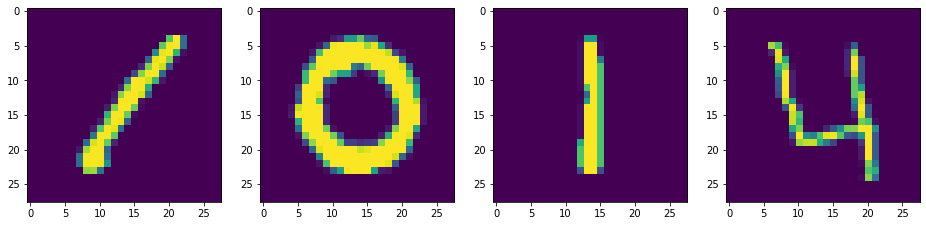

In [ ]:
# 시각화
plt.figure(figsize=(16, 4)) 
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(train_drop.values[i].reshape(28, 28))
plt.show()

### 학습 모델 생성

In [ ]:
# 학습 데이터 길이 확인
l = len(train)
l

42000

In [ ]:
# 28*28의 형태로 변환후 0~1 사이의 값으로 변환
_x = torch.Tensor(train.iloc[:,1:].values).reshape(l,28,28) / 256
_x

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [ ]:
# (batch_size, depth, width, height)로 형태를 맞추기 위한 코드
_x = _x.unsqueeze(1)
_x

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
_y = torch.Tensor(train.iloc[:,0].values).type(torch.long)

In [ ]:
# train,valid 분활
train_x, valid_x = _x[:39000],_x[39000:]
train_y, valid_y = _y[:39000],_y[39000:]

In [ ]:
# torch.utils.data의 Dataset과 DataLoader를 이용하여 데이터를 불러오고, shuffle하거나, batch별로 불러오는 작업을 간단히 수행할 수 있습니다.
class DigitDataset(Dataset):
    
    def __init__(self,x,y=None):
        super(DigitDataset).__init__()
        self.x = x
        self.y = y
        
    def __getitem__(self,idx):
        if self.y == None:
            return self.x[idx]
        return self.x[idx],self.y[idx]
    
    def __len__(self):
        return len(self.x)

In [ ]:
trainset = DigitDataset(train_x,train_y)
validset = DigitDataset(valid_x,valid_y)
train_dl = DataLoader(trainset,batch_size = CONFIG.batch_size,shuffle=True)
valid_dl = DataLoader(validset,batch_size = CONFIG.batch_size)

In [ ]:
class DigitModel(nn.Module):
    
    def __init__(self):
        super(DigitModel,self).__init__()
        
        self.model = nn.Sequential(
            nn.Conv2d(1,32,3),
            nn.Conv2d(32,8,3),
            nn.Flatten(),
            nn.Linear(24*24*8,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,10)
        )
        
    def forward(self,x):
        x = self.model(x)
        x = torch.softmax(x,dim=-1)
        return x

In [ ]:
model = DigitModel().to(device)
model

DigitModel(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(32, 8, kernel_size=(3, 3), stride=(1, 1))
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=4608, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=10, bias=True)
  )
)

### 모델 학습

다중분류를 위한 손실함수를 확인하는데 사용되는 torch.nn.CrossEntropyLoss는

- PyTorch에서는 다양한 손실함수를 제공하는데, 그 중 torch.nn.CrossEntropyLoss는 다중 분류에 사용됩니다.
- torch.nn.CrossEntropyLoss는 nn.LogSoftmax와 nn.NLLLoss의 연산의 조합입니다. 
- nn.LogSoftmax는 신경망 말단의 결과 값들을 확률개념으로 해석하기 위한 Softmax 함수의 결과에 log 값을 취한 연산이고, nn.NLLLoss는 nn.LogSoftmax의 log 결과값에 대한 교차 엔트로피 손실 연산(Cross Entropy Loss|Error)입니다.

Optimizer 종류는

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbQ934t%2FbtqASyVqeeD%2FozNDSKWvAbxiJb7VtgLkSk%2Fimg.png)

In [ ]:
# 학습에는 손실함수로 CrossEntropy가 사용되었고, optimizer는 Adam을 사용하겠습니다.
lossfn = nn.CrossEntropyLoss() # Log, Softmax, NLLLoss 연산을 한 번에 하기 때문에 NLLLoss 보다 수식이 간소화되어 더 안정적으로 역전파가 이루어짐
opt = torch.optim.Adam(model.parameters(), lr=CONFIG.lr) # Optimizer 종류

딥러닝에서 사용되는 배치사이즈와 에폭은

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FnCJ6J%2FbtqEKREai4u%2FrxMnC8dLCSgkP3FWEt00C0%2Fimg.png)

- 배치사이즈가 너무 크다면 한 번에 처리해야 할 양이 그만큼 많기 때문에 학습 속도가 느리고 메모리 부족 문제가 발생할 수 있음
- 따라서 배치사이즈를 조금 줄여서 훈련셋을 더 많은 배치로 나눠 모델을 훈련시키는 것이 더욱 효과적인

In [ ]:
# 한번의 epoch에 대하여 trainset 전체를 한번 학습하고 validset으로 검증이 이루어지는 코드입니다.
for e in range(CONFIG.epoch):
    print(f"Training on progress... {e+1}/{CONFIG.epoch}")
    acc =0
    total =0
    
    model.train() # train
    for x,y in train_dl:
        x = x.to(device)
        y = y.to(device)
        y_hat = model(x)
        loss = lossfn(y_hat,y)
        
        opt.zero_grad()
        loss.backward()
        opt.step()
        
    model.eval() #valid
    with torch.no_grad():
        for vx,vy in valid_dl:
            vx = vx.to(device)
            vy = vy.to(device)
            
            vy_hat = model(vx)
            pred = vy_hat.max(dim=1)[1]
            acc += (pred == vy).sum().item()
    print(f"Epoch {e+1} : Acc {100*acc/3000}")

Training on progress... 1/10
Epoch 1 : Acc 92.2
Training on progress... 2/10
Epoch 2 : Acc 93.73333333333333
Training on progress... 3/10
Epoch 3 : Acc 95.63333333333334
Training on progress... 4/10
Epoch 4 : Acc 95.13333333333334
Training on progress... 5/10
Epoch 5 : Acc 95.8
Training on progress... 6/10
Epoch 6 : Acc 95.83333333333333
Training on progress... 7/10
Epoch 7 : Acc 95.76666666666667
Training on progress... 8/10
Epoch 8 : Acc 96.46666666666667
Training on progress... 9/10
Epoch 9 : Acc 96.16666666666667
Training on progress... 10/10
Epoch 10 : Acc 96.63333333333334


### 테스트 데이터 예측

In [ ]:
# 테스트 데이터 길이 확인
l = len(test)
l

28000

In [ ]:
# 28*28의 형태로 변환후 0~1 사이의 값으로 변환
test_x = torch.Tensor(test.values).reshape(l,28,28) / 256

In [ ]:
# # (batch_size, depth, width, height)로 형태를 맞추기 위한 코드
test_x = test_x.unsqueeze(1)

In [ ]:
# 예측
outputs = model(test_x)
_, pred = torch.max(outputs, 1)
pred = pred.cpu()

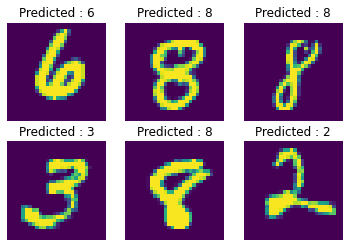

In [ ]:
# 분류 결과 확인
for i,img in enumerate(test_x[50:56]) :
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.title(f"Predicted : {pred[50+i]}")
    plt.imshow(img.squeeze(0))

### 제출하기

In [ ]:
# 제출 양식에 맞게 데이터 생성
submission = pd.DataFrame({'ImageId': np.arange(1, (pred.size(0) + 1)), 'Label': pred})
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
# 제출 데이터 다운로드
submission.to_csv("submission.csv", index = False)